# Pima Indians Diabetic Dataset

In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [325]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [326]:
df_diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [327]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [328]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Paso 1: Tratar valores incorrectos

Reemplazaré los valores de *Glucose*, *BloodPressure*, *SkinThickness*, *Insulin*, *BMI* que tengan registros de 0 por Nan para hacer que sea más diferenciarlos.

In [329]:
df_diabetes_filt1 = df_diabetes.copy(deep = True)
df_diabetes_filt1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_diabetes_filt1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print('Número de registros: ')
print(df_diabetes_filt1.isnull().sum())
print('----------------------------')
print('Porcentaje en el dataset: ')
print((df_diabetes_filt1.isnull().sum()/ 768).round(2) * 100)

Número de registros: 
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
----------------------------
Porcentaje en el dataset: 
Pregnancies                  0.0
Glucose                      1.0
BloodPressure                5.0
SkinThickness               30.0
Insulin                     49.0
BMI                          1.0
DiabetesPedigreeFunction     0.0
Age                          0.0
Outcome                      0.0
dtype: float64


### Distribución de los datos antes del filtrado

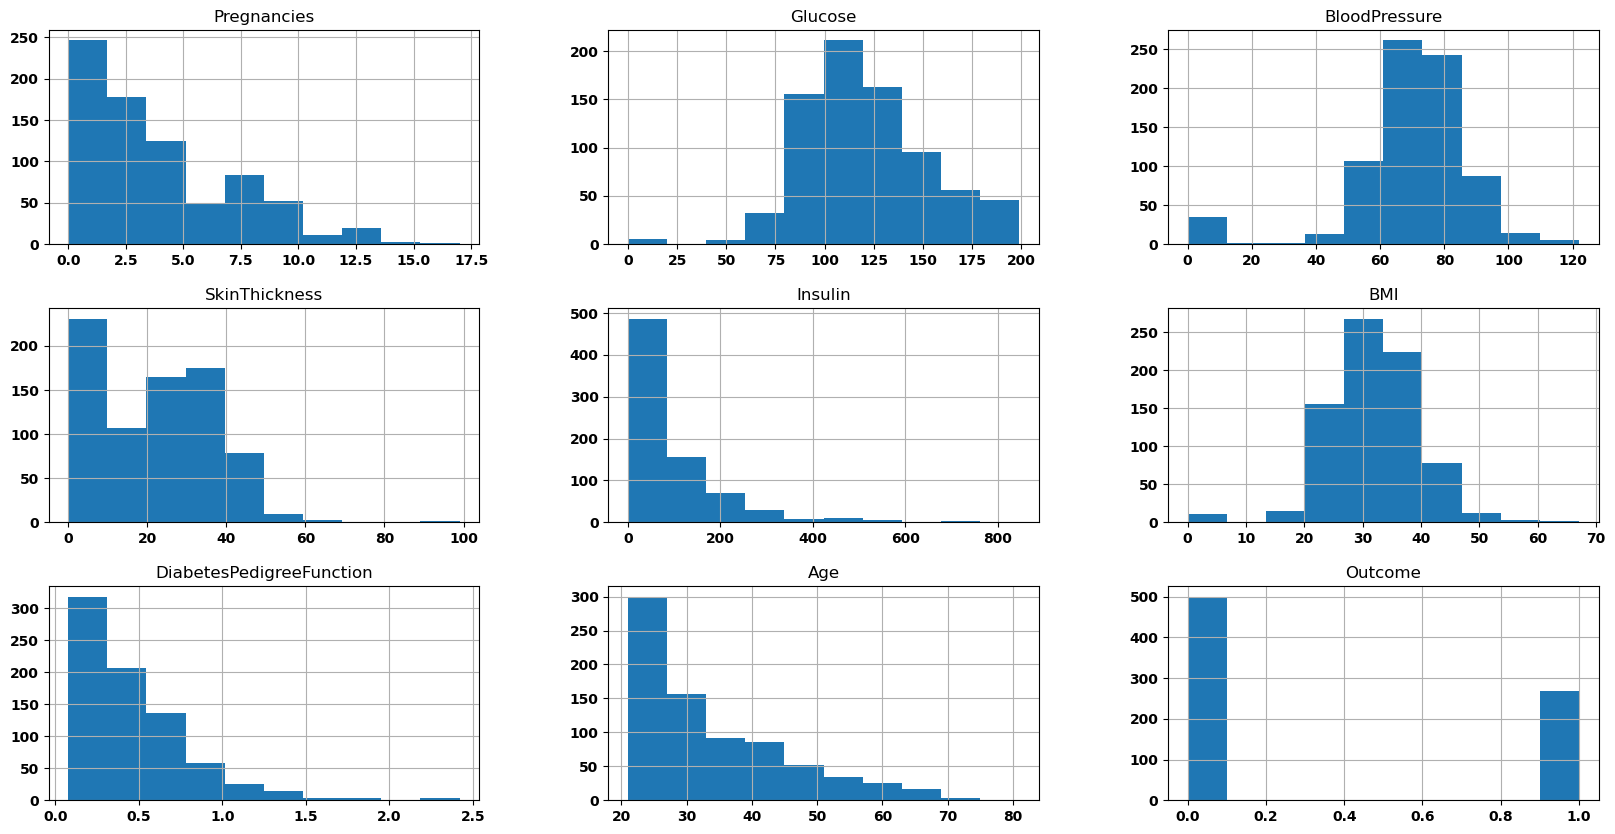

In [330]:
p = df_diabetes.hist(figsize = (20,10))

Si elimino los registros con valores perdidos mi dataset tendría muy pocos registros para continuar con el estudio. Por lo tanto he decidido reemplazarlos por valores que estén dentro de lo más común en esta población.

In [331]:
df_diabetes_filt1['Glucose'].fillna(df_diabetes_filt1['Glucose'].median(), inplace = True)
df_diabetes_filt1['BloodPressure'].fillna(df_diabetes_filt1['BloodPressure'].median(), inplace = True)
df_diabetes_filt1['SkinThickness'].fillna(df_diabetes_filt1['SkinThickness'].median(), inplace = True)
df_diabetes_filt1['Insulin'].fillna(df_diabetes_filt1['Insulin'].median(), inplace = True)
df_diabetes_filt1['BMI'].fillna(df_diabetes_filt1['BMI'].median(), inplace = True)

### Distribución de los datos después del filtrado

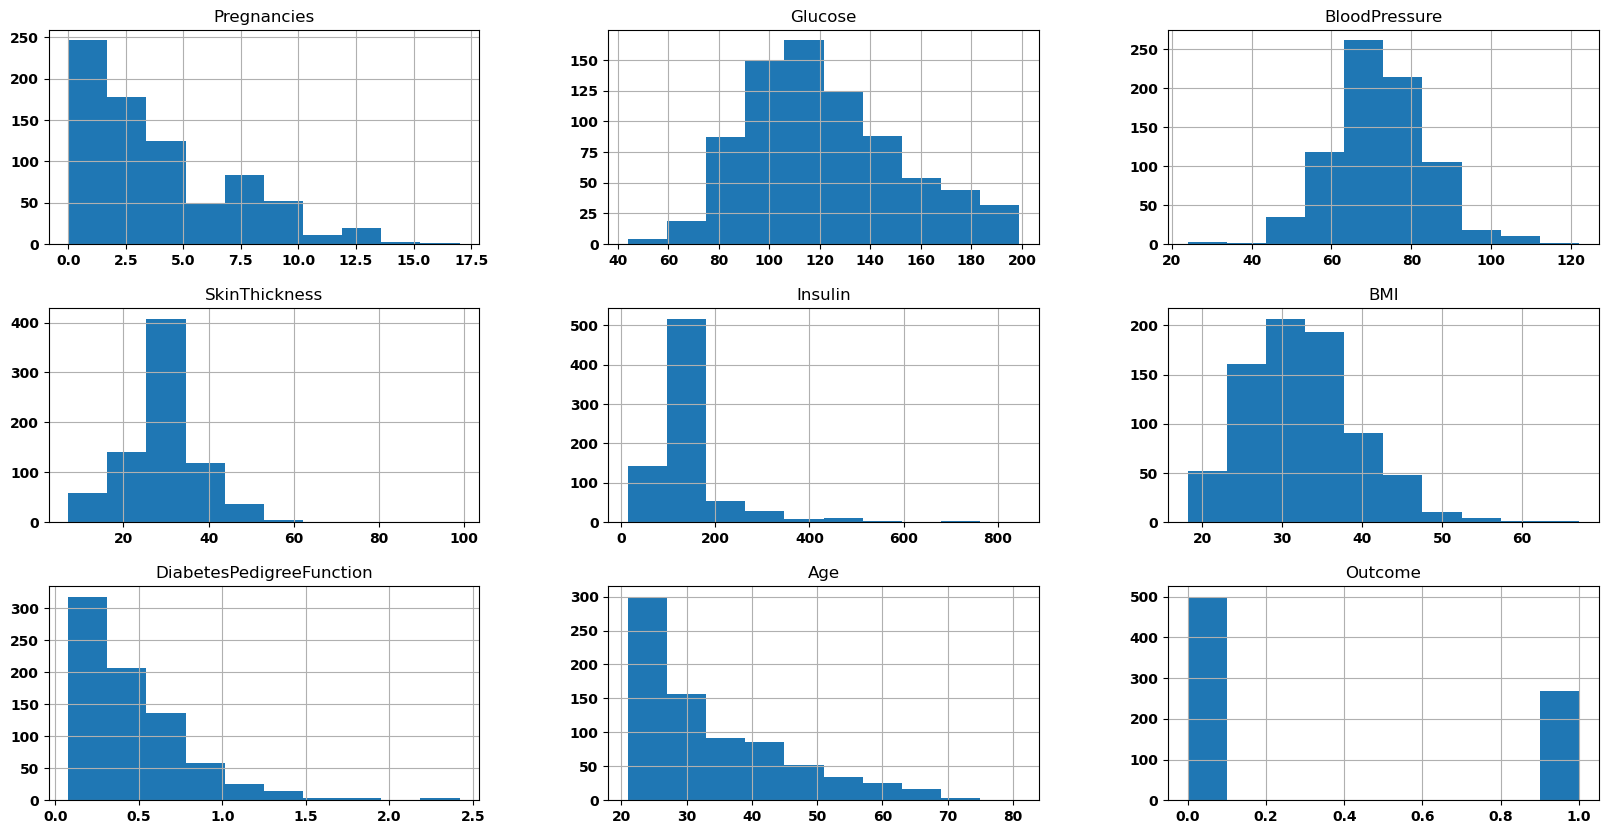

In [332]:
p = df_diabetes_filt1.hist(figsize = (20,10))

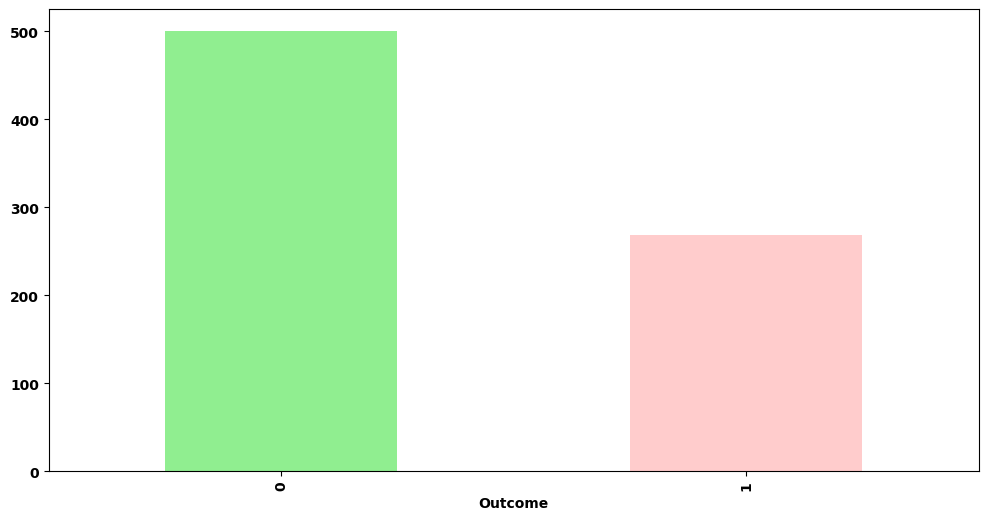

In [333]:
df_diabetes["Outcome"].value_counts().plot(kind="bar", color=["#90EE90", "#FFCCCC"])
plt.show()

## Paso 2: Identificación de outliers

<Axes: >

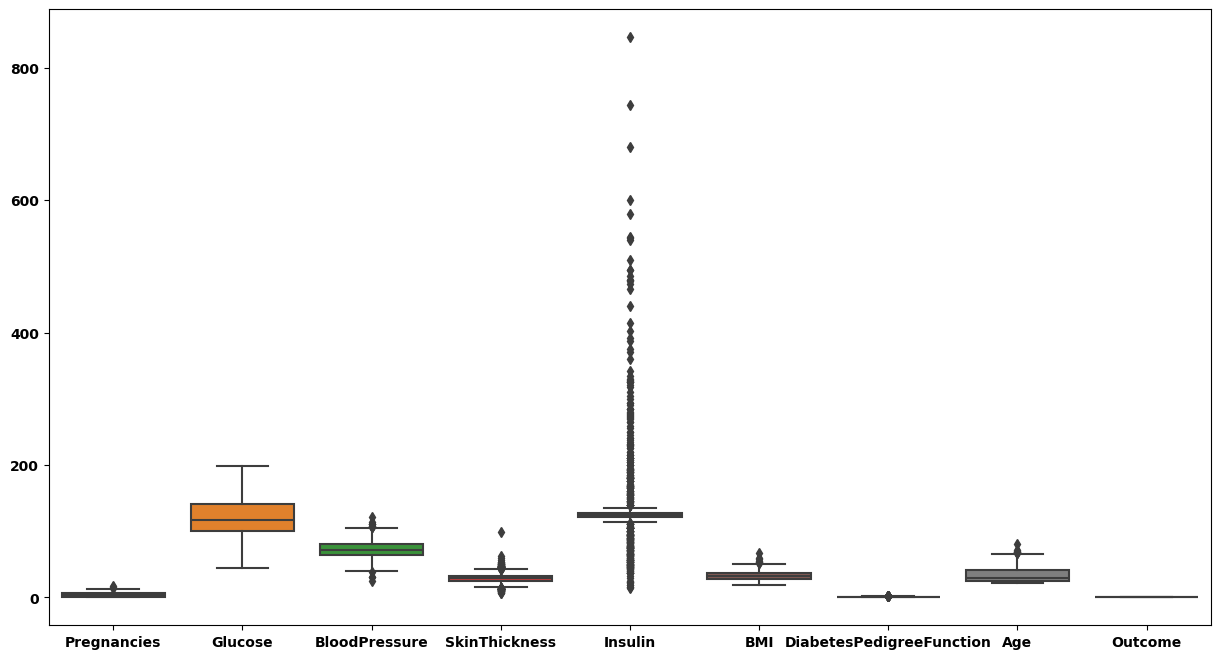

In [334]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df_diabetes_filt1,  orient='v')

El primer valor que más destaca por su gran cantidad de outliers es la Insulina.

<Axes: >

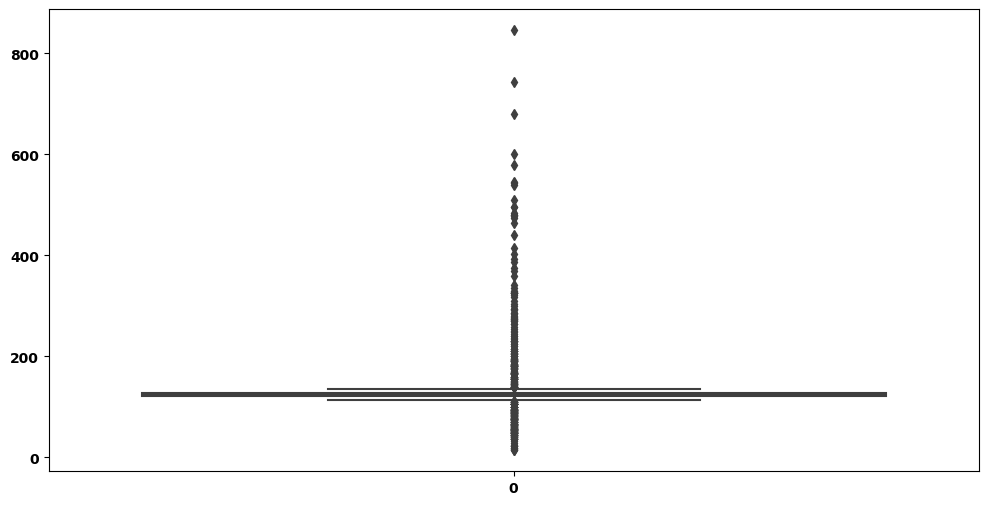

In [335]:
sns.boxplot(data=df_diabetes_filt1['Insulin'],  orient='v')

### Filtrado 1 de outliers 

/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Insulin', ylabel='Count'>

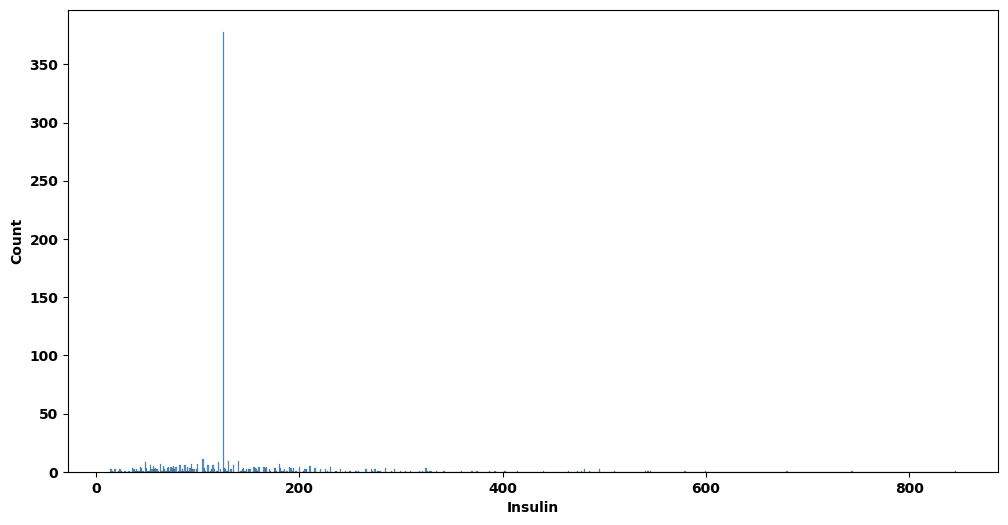

In [336]:
sns.histplot(df_diabetes_filt1['Insulin'])

In [337]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_diabetes_filt1['Insulin'].quantile(0.25)
Q3 = df_diabetes_filt1['Insulin'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_diabetes_filt1['Insulin'] < lim_inf) | (df_diabetes_filt1['Insulin'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_diabetes_out = df_diabetes_filt1[filtro_oulier] 
df_diabetes_out

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [338]:
# El porcentaje que componen estos valores del todo el dataset
df_diabetes_out.shape[0]/df_diabetes_filt1.shape[0] * 100

45.05208333333333

In [339]:
df_diabetes_out.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,3.179191,122.011561,70.841040,29.002890,159.846821,33.036994,0.529098,30.716763,0.315029
std,3.133221,31.310690,12.556453,10.780148,126.142832,6.948725,0.353839,10.354337,0.465200
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.088000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.000000,72.250000,28.400000,0.273000,23.000000,0.000000
50%,2.000000,118.500000,71.000000,29.000000,126.000000,33.250000,0.452000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,200.000000,37.175000,0.687000,35.000000,1.000000
max,15.000000,198.000000,110.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Insulin', ylabel='Count'>

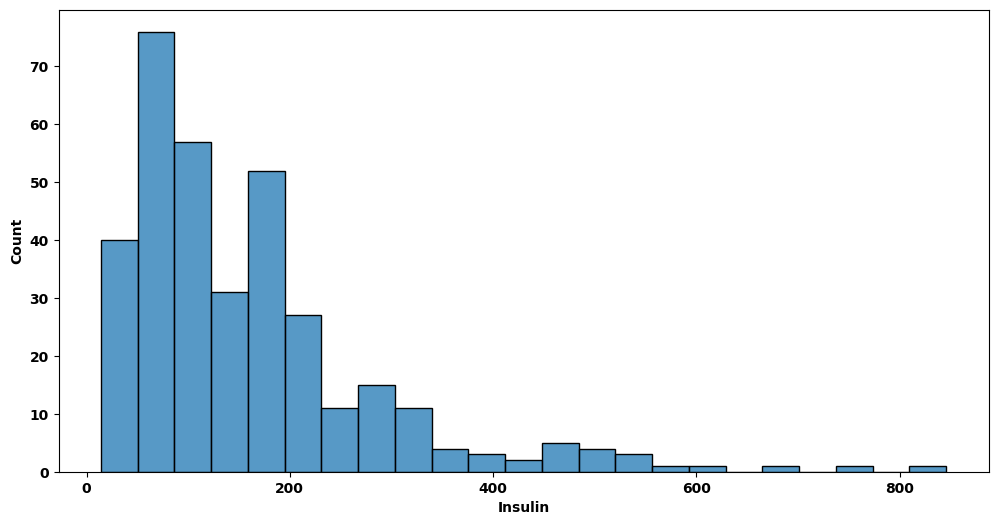

In [340]:
sns.histplot(df_diabetes_out['Insulin'])

<Axes: >

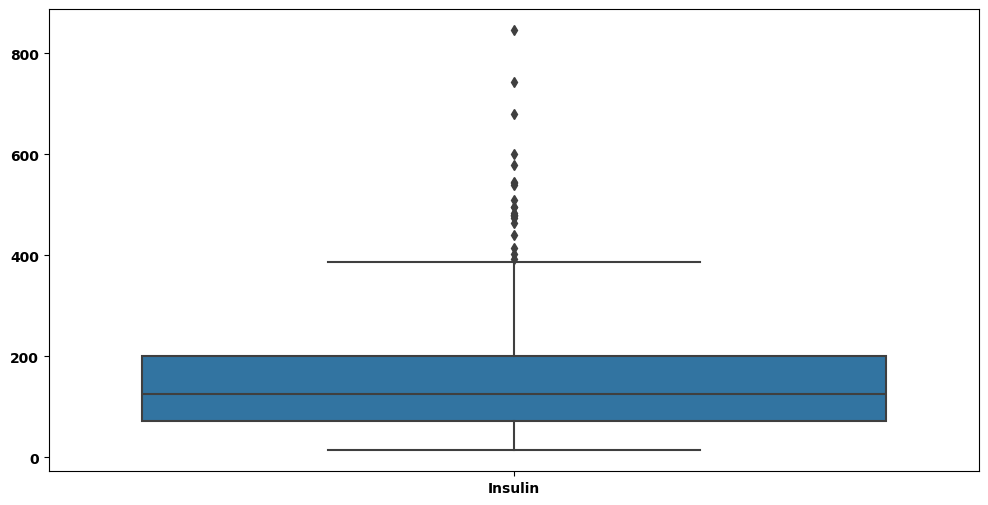

In [341]:
sns.boxplot(data=df_diabetes_out['Insulin'].reset_index().drop('index', axis='columns'), orient='V')

### Filtrado 2 de ouliers

In [342]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_diabetes_out['Insulin'].quantile(0.25)
Q3 = df_diabetes_out['Insulin'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos 
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_diabetes_out['Insulin'] < lim_inf) | (df_diabetes_out['Insulin'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_diabetes_out2 = df_diabetes_out[filtro_oulier] 
df_diabetes_out2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,0
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
248,9,124.0,70.0,33.0,402.0,35.4,0.282,34,0
286,5,155.0,84.0,44.0,545.0,38.7,0.619,34,0


In [343]:
# El porcentaje que componen estos valores de todo el dataset
df_diabetes_out2.shape[0]/df_diabetes_filt1.shape[0] * 100

2.734375

In [344]:
df_diabetes_out2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,21.00000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,3.47619,163.190476,71.714286,34.380952,528.000000,36.109524,0.637571,33.857143,0.619048
std,3.10836,22.475807,12.021409,9.340643,112.373484,6.252832,0.586116,13.020314,0.497613
min,0.00000,124.000000,50.000000,14.000000,392.000000,23.700000,0.128000,21.000000,0.000000
25%,1.00000,153.000000,62.000000,27.000000,474.000000,30.500000,0.258000,23.000000,0.000000
50%,2.00000,165.000000,70.000000,33.000000,495.000000,35.700000,0.536000,30.000000,1.000000
75%,7.00000,181.000000,82.000000,42.000000,545.000000,39.400000,0.687000,43.000000,1.000000
max,9.00000,197.000000,90.000000,49.000000,846.000000,52.300000,2.329000,60.000000,1.000000


/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Insulin', ylabel='Count'>

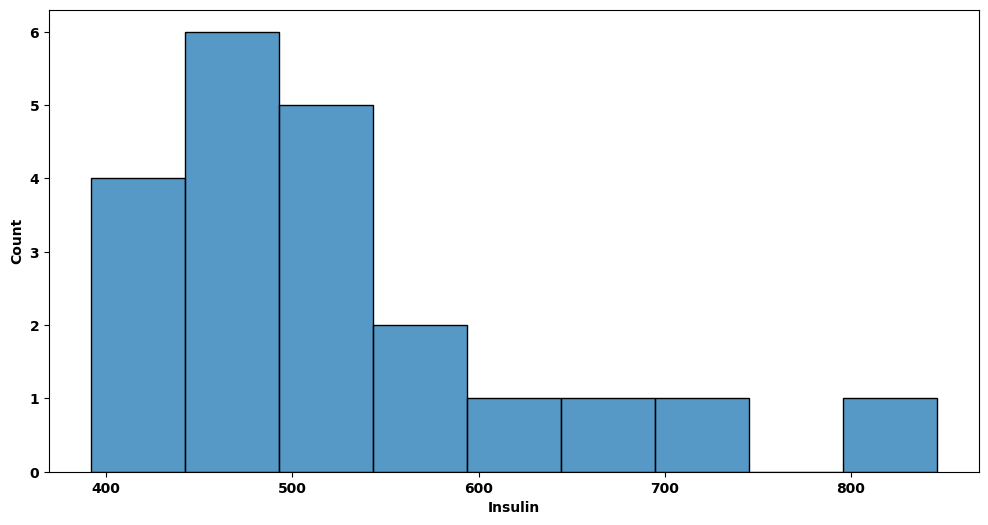

In [345]:
sns.histplot(df_diabetes_out2['Insulin'])

<Axes: >

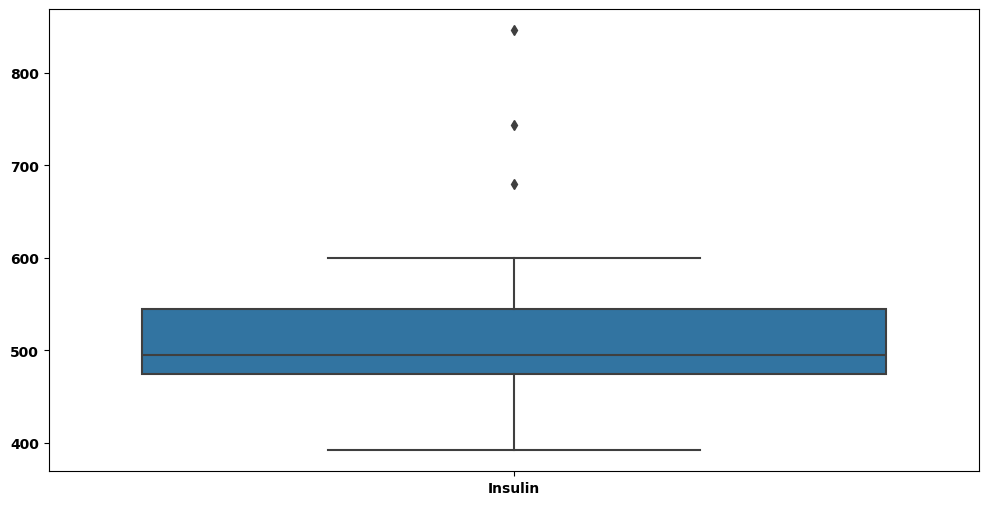

In [346]:
sns.boxplot(data=df_diabetes_out2['Insulin'].reset_index().drop('index', axis='columns'), orient='V')

### Filtrado 3 de outliers

In [347]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_diabetes_out2['Insulin'].quantile(0.25)
Q3 = df_diabetes_out2['Insulin'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos 
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_diabetes_out2['Insulin'] < lim_inf) | (df_diabetes_out2['Insulin'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_diabetes_out3 = df_diabetes_out2[filtro_oulier] 
df_diabetes_out3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0


In [348]:
# El porcentaje que componen estos valores de todo el dataset
df_diabetes_out3.shape[0]/df_diabetes_filt1.shape[0] * 100

0.390625

In [349]:
df_diabetes_out.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,3.179191,122.011561,70.841040,29.002890,159.846821,33.036994,0.529098,30.716763,0.315029
std,3.133221,31.310690,12.556453,10.780148,126.142832,6.948725,0.353839,10.354337,0.465200
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.088000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.000000,72.250000,28.400000,0.273000,23.000000,0.000000
50%,2.000000,118.500000,71.000000,29.000000,126.000000,33.250000,0.452000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,200.000000,37.175000,0.687000,35.000000,1.000000
max,15.000000,198.000000,110.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [350]:
df_diabetes_filt2 = df_diabetes_filt1
df_diabetes_filt2 = df_diabetes_filt2.drop(index=df_diabetes_out3.index).reset_index(drop=True)

Registros restantes tras eliminar los outliers

In [351]:
df_diabetes_filt1.shape[0] - df_diabetes_out3.shape[0]

765

## Paso 3: Normalización del dataset

#### Distribución tras reemplazo de registros incorrectos

<Axes: >

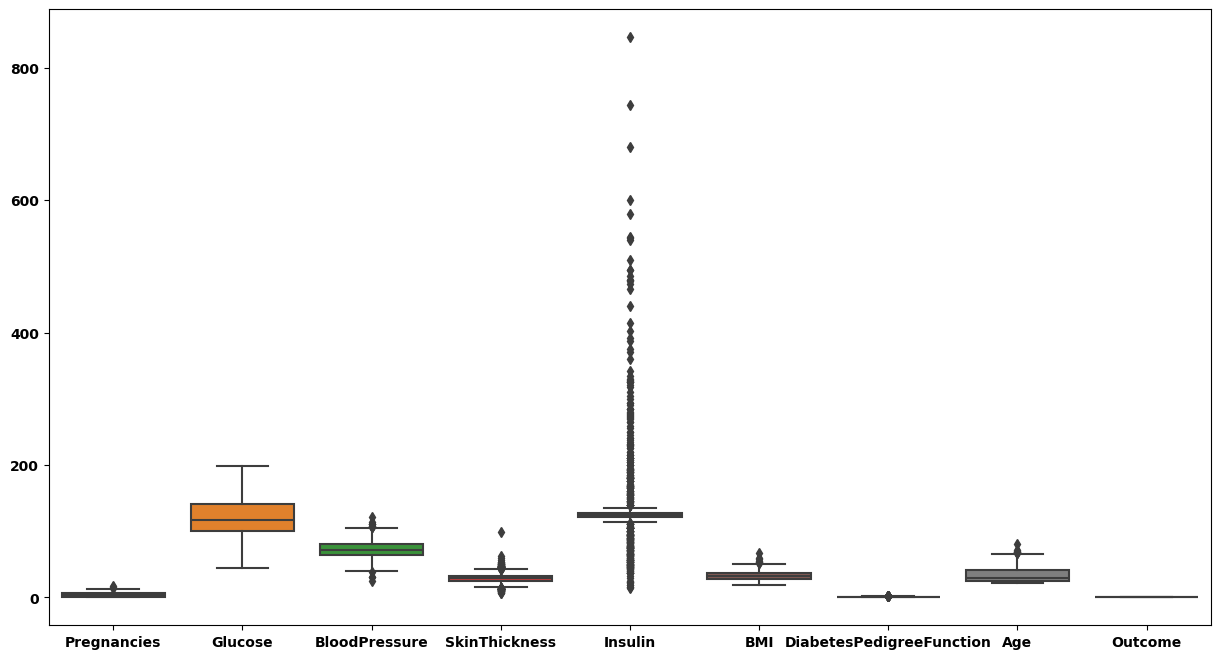

In [352]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df_diabetes_filt1,  orient='v')

### Distribución tras eliminación de outliers

<Axes: >

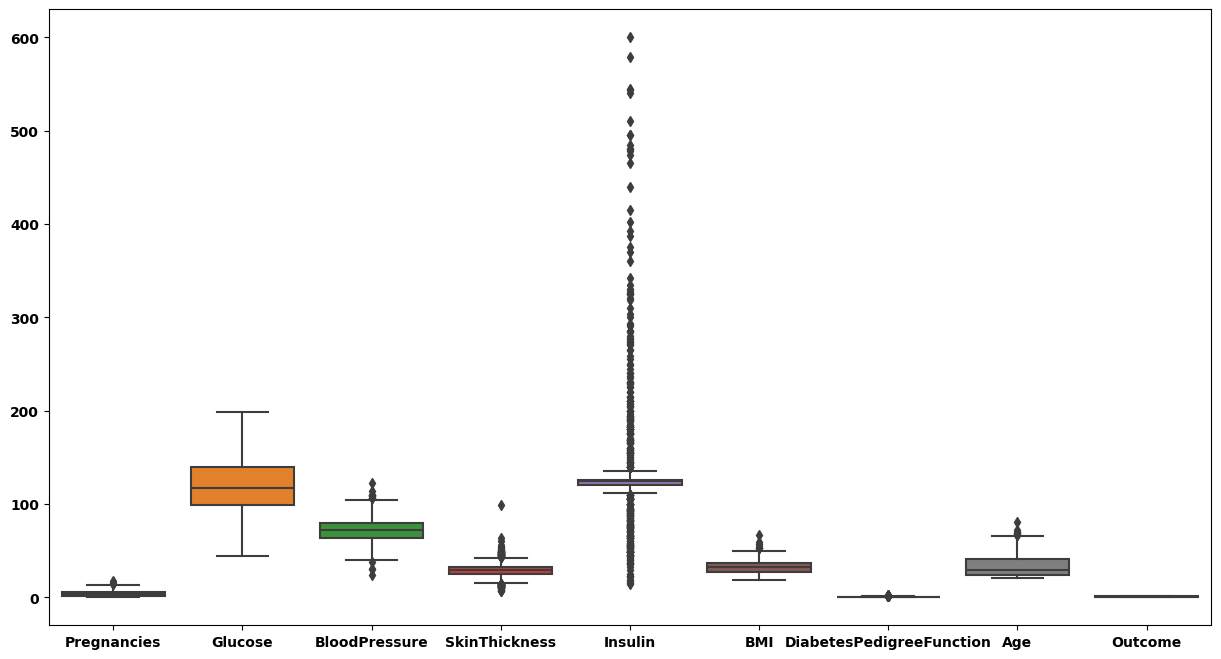

In [353]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=df_diabetes_filt2,  orient='v')

In [354]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_diabetes_filt2.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

### Distribución tras normalización

<Axes: >

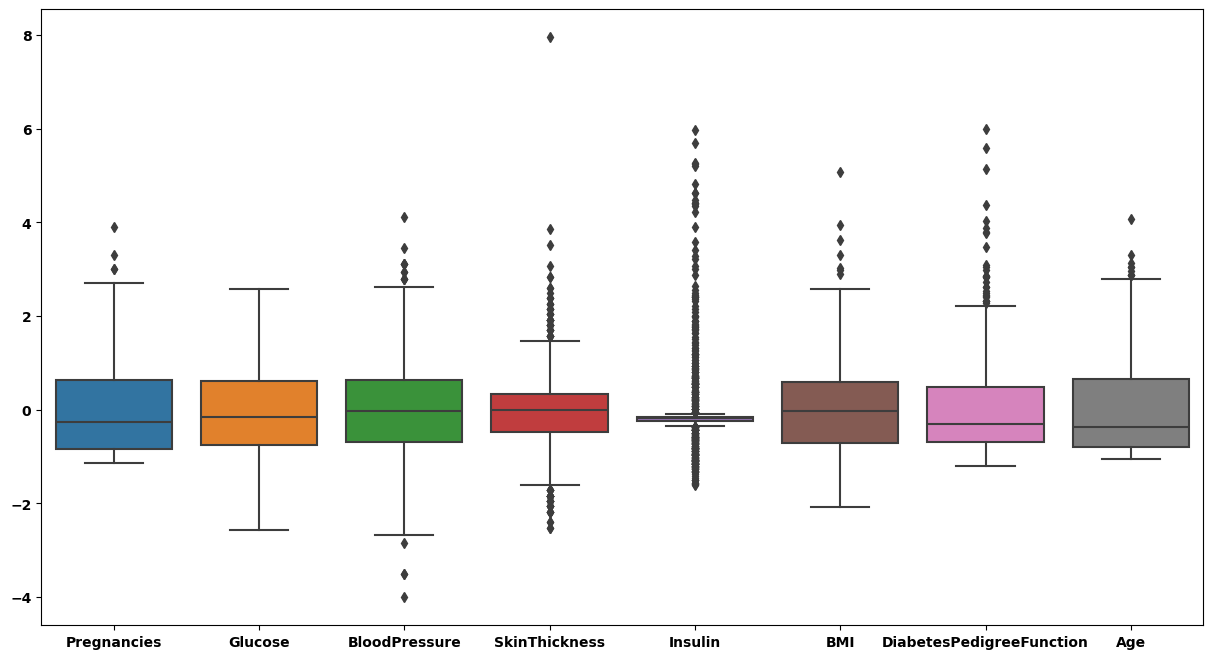

In [355]:
plt.figure(figsize=(15,8)) 
sns.boxplot(data=X,  orient='v')

In [356]:
y = df_diabetes_filt2.Outcome

## Paso 4: Separación del conjunto de entrenamiento y de prueba

In [357]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Paso 5: Búsqueda del modelo óptimo

# Modelo KNeighborsClassifier

### Modelo KNeighborsClassifier por defecto

In [358]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

clas_knn = KNeighborsClassifier()

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_knn.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_knn = clas_knn.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))

print('AUC:', roc_auc_score(y_test, y_pred_knn))

Acuuracy: 0.738562091503268
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       102
           1       0.62      0.57      0.59        51

    accuracy                           0.74       153
   macro avg       0.70      0.70      0.70       153
weighted avg       0.73      0.74      0.74       153

AUC: 0.696078431372549


#### Búsqueda de los vecinos más cercanos óptimos

El mejor valor de n_neighbors podría ser = 10  que consigue un Accuracy = 0.803921568627451


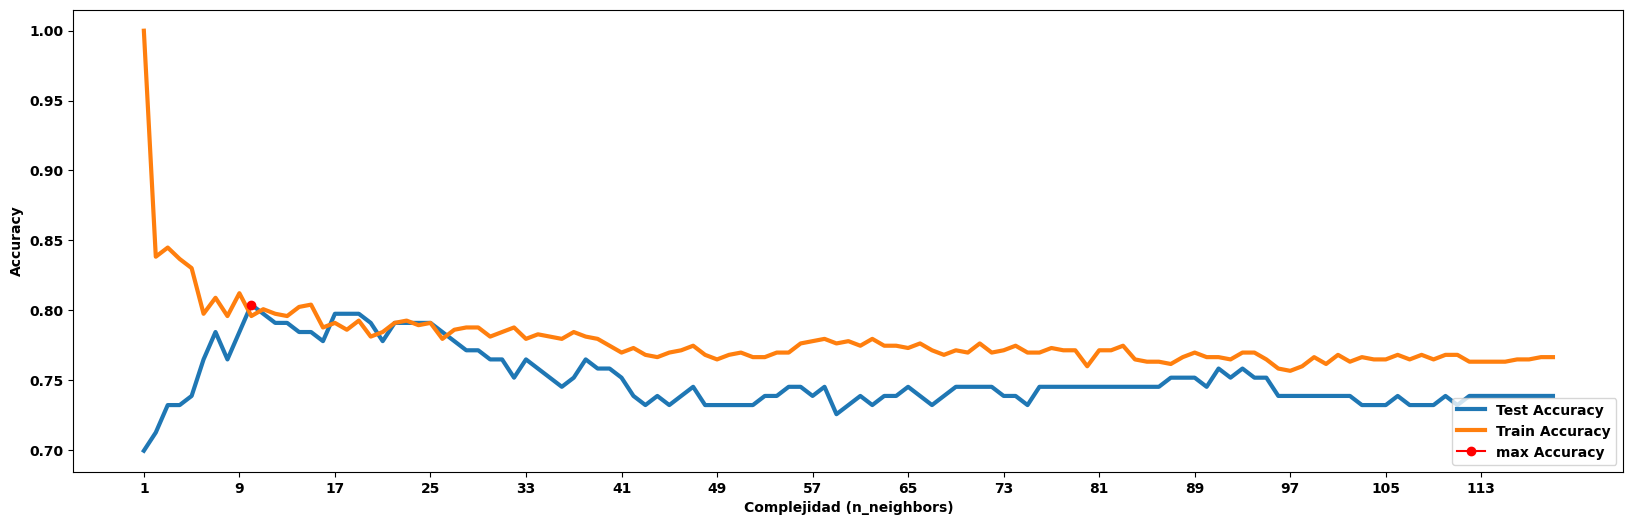

In [359]:
from sklearn.neighbors import KNeighborsClassifier

# Consideramos un rango para asignar el hiperparámetro 
hiper_param_neighbors = np.arange(1,120)  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
train_score = np.zeros(hiper_param_neighbors.size) 
test_score = np.zeros(hiper_param_neighbors.size) 

for i in range(hiper_param_neighbors.size):
    # Generamos un modelo con cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_knn = KNeighborsClassifier(n_neighbors=hiper_param_neighbors[i])
    mod_knn.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_knn.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_knn.predict(X_test))    

print("El mejor valor de n_neighbors podría ser =", hiper_param_neighbors[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param_neighbors, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_neighbors, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_neighbors[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(np.arange(1,120, 8))
plt.xlabel('Complejidad (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

#### Búsqueda de los pesos óptimos

El mejor valor de weights podría ser = uniform  que consigue un Accuracy = 0.803921568627451


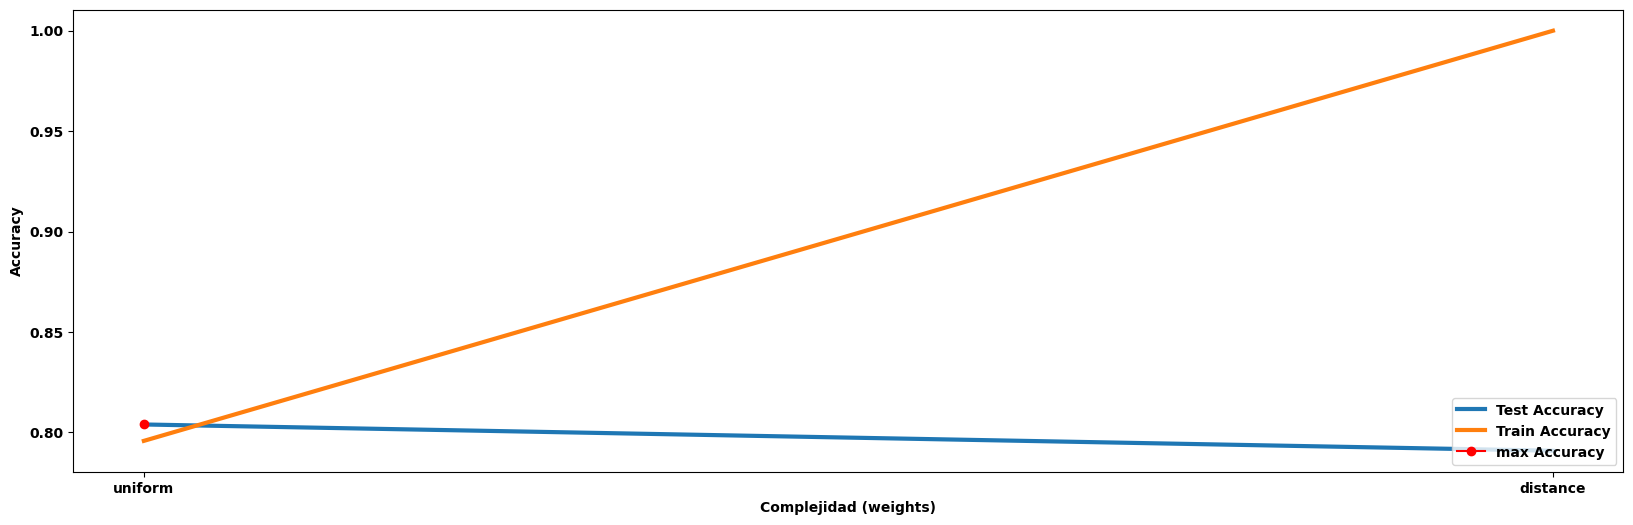

In [360]:
from sklearn.neighbors import KNeighborsClassifier

# Consideramos un rango para asignar el hiperparámetro 
hiper_param_weights = np.array(['uniform', 'distance'])  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
train_score = np.zeros(hiper_param_weights.size) 
test_score = np.zeros(hiper_param_weights.size) 

for i in range(hiper_param_weights.size):
    # Generamos un modelo con cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_knn = KNeighborsClassifier(n_neighbors=10,
                                   weights=hiper_param_weights[i])
    mod_knn.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_knn.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_knn.predict(X_test))    

print("El mejor valor de weights podría ser =", hiper_param_weights[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param_weights, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_weights, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_weights[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_weights)
plt.xlabel('Complejidad (weights)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

#### Búsqueda del parámetro p óptimo (Minkowski metric)

El mejor valor de p podría ser = 1  que consigue un Accuracy = 0.8169934640522876


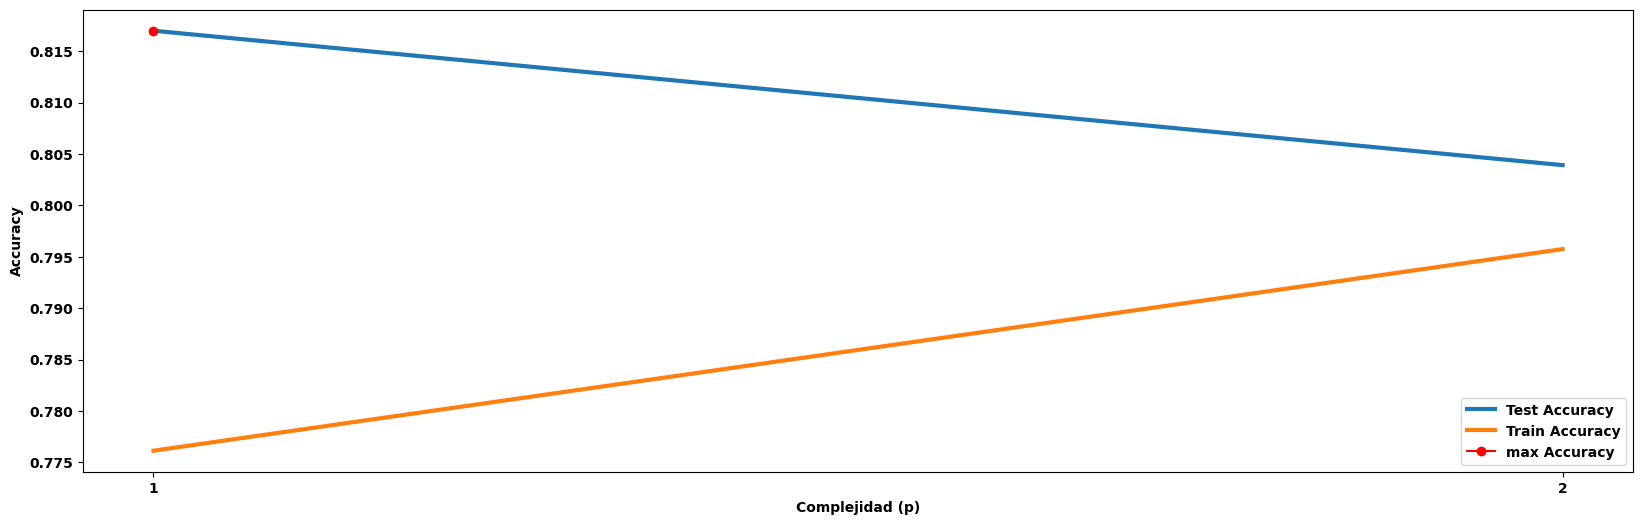

In [361]:
from sklearn.neighbors import KNeighborsClassifier

# Consideramos un rango para asignar el hiperparámetro 
hiper_param_p = np.array([1, 2])  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
train_score = np.zeros(hiper_param_p.size) 
test_score = np.zeros(hiper_param_p.size) 

for i in range(hiper_param_p.size):
    # Generamos un modelo con cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_knn = KNeighborsClassifier(n_neighbors=10,
                                   weights='uniform',
                                   p=hiper_param_p[i])
    mod_knn.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_knn.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_knn.predict(X_test))    

print("El mejor valor de p podría ser =", hiper_param_p[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param_p, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_p, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_p[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_p)
plt.xlabel('Complejidad (p)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

## Modelo KNeighborsClassifier usando curvas de complejidad

In [362]:
from sklearn.neighbors import KNeighborsClassifier

clas_knn_opt = KNeighborsClassifier(n_neighbors=10, 
                                    weights='uniform', 
                                    p=1)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_knn_opt.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_knn_opt = clas_knn_opt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_knn_opt))

print(classification_report(y_test, y_pred_knn_opt))

print('AUC:', roc_auc_score(y_test, y_pred_knn_opt))

Accuracy: 0.8169934640522876
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       102
           1       0.85      0.55      0.67        51

    accuracy                           0.82       153
   macro avg       0.83      0.75      0.77       153
weighted avg       0.82      0.82      0.80       153

AUC: 0.75


### Curva ROC Modelo KNeighborsClassifier por defecto

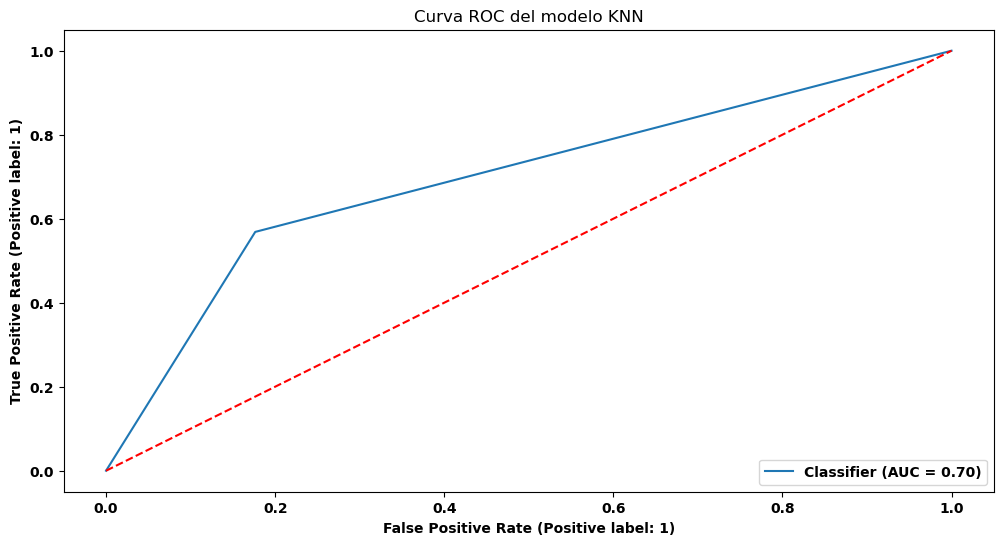

In [363]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_knn)

# Añadir una línea diagonal que representa la "línea de referencia" o la "línea de aleatoriedad"
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.title("Curva ROC del modelo KNN")
plt.show()

### Curva ROC Modelo KNeighborsClassifier usando curvas de complejidad

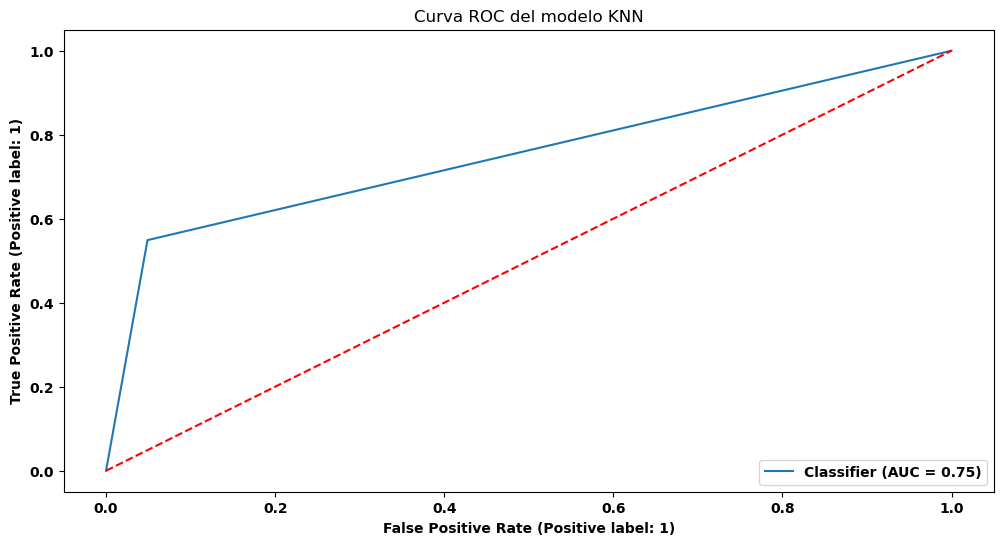

In [364]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_knn_opt)

# Añadir una línea diagonal que representa la "línea de referencia" o la "línea de aleatoriedad"
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.title("Curva ROC del modelo KNN")
plt.show()

#### ConfusionMatrix Modelo KNeighborsClassifier por defecto

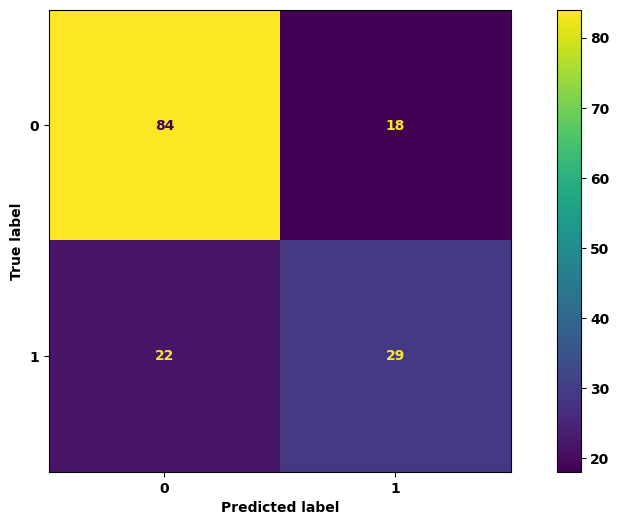

In [365]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn))
disp.plot()

plt.show()

#### ConfusionMatrix Modelo KNeighborsClassifier usando curvas de complejidad

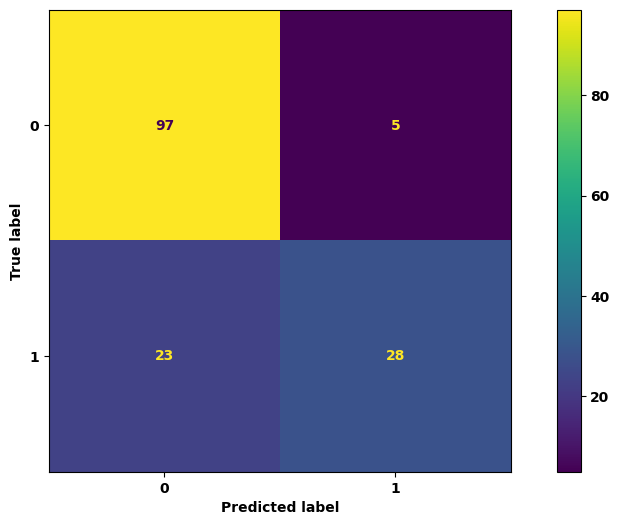

In [366]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn_opt))
disp.plot()

plt.show()

In [367]:
def curva_aprendizaje(n_neighbors: int = 3, 
                            weights: any = "uniform",
                            p: int = 2):
        
    modelo = KNeighborsClassifier(n_neighbors=n_neighbors,
                                    weights=weights,
                                    p=p,
                                    n_jobs=-1)
    
    num_samples = np.linspace(100, X_train.shape[0]).astype(int)
    num_xticks = np.linspace(100, X_train.shape[0], 5).astype(int)

    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        modelo.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    plt.figure(figsize=(20,8)) 
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.plot(num_samples[np.argmax(test_score)], max(test_score),
            marker='o', color = "red", label="Max Accuracy")
    
    plt.xticks(num_xticks)
    plt.title('Curva de aprendizaje (Learning Curve) para el modelo KNeighborsClassifier')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show() 

#### Curva de aprendizaje Modelo KNeighborsClassifier usando curvas de complejidad

La diferencia final del rendimiento del modelo entre training y test es=  -0.040849673202614345


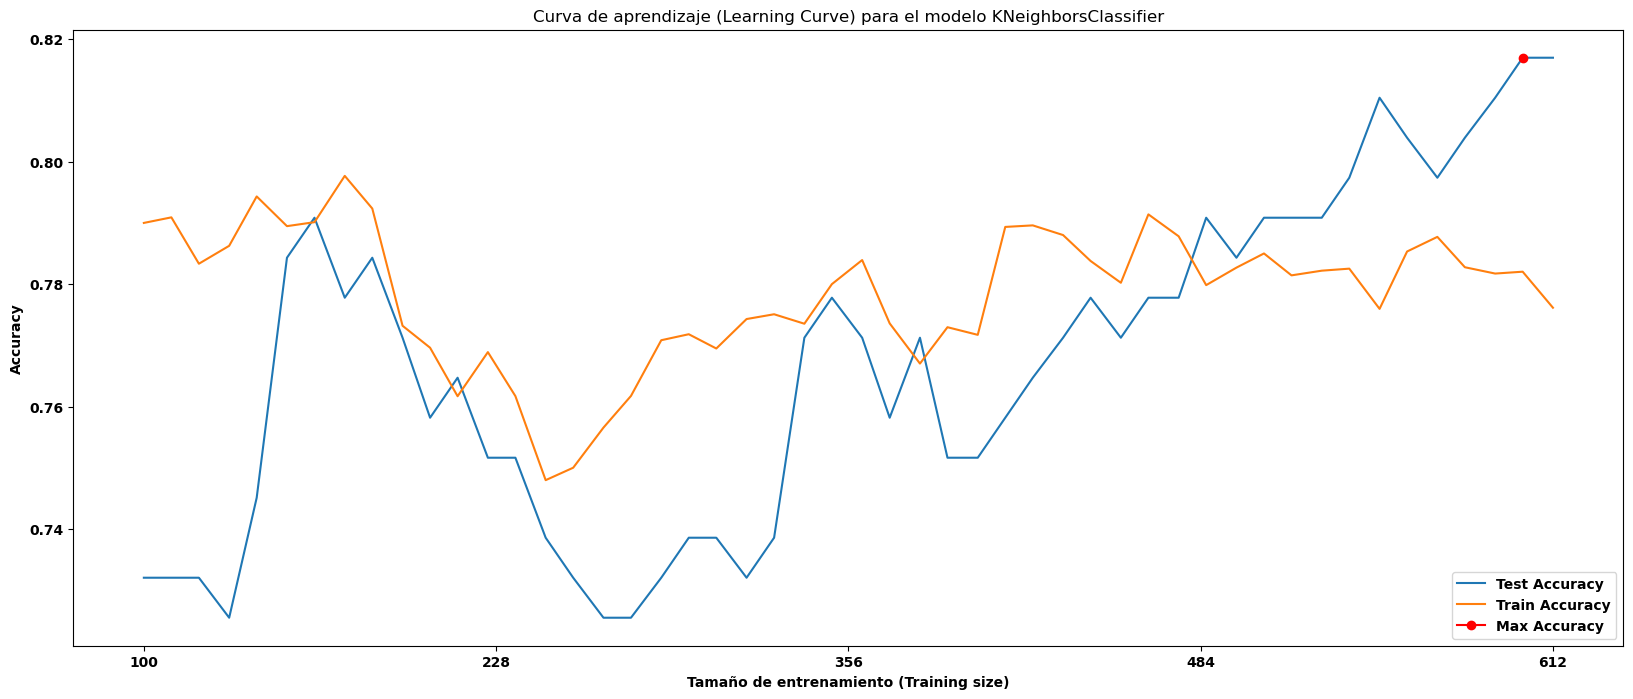

In [368]:
curva_aprendizaje(clas_knn_opt.n_neighbors, clas_knn_opt.weights, clas_knn_opt.p)

#### Curva de aprendizaje Modelo KNeighborsClassifier por defecto

# Modelo XGBoost

### Modelo XGBoost por defecto

In [369]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
 
modelo_xgb = XGBClassifier(random_state=100) 
modelo_xgb.fit(X_train, y_train) 
y_pred_xgb = modelo_xgb.predict(X_test)


In [370]:
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("F1-score: ", f1_score(y_test, y_pred_xgb, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

Accuracy:  0.7647058823529411
F1-score:  0.763495145631068
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       102
           1       0.65      0.63      0.64        51

    accuracy                           0.76       153
   macro avg       0.74      0.73      0.73       153
weighted avg       0.76      0.76      0.76       153



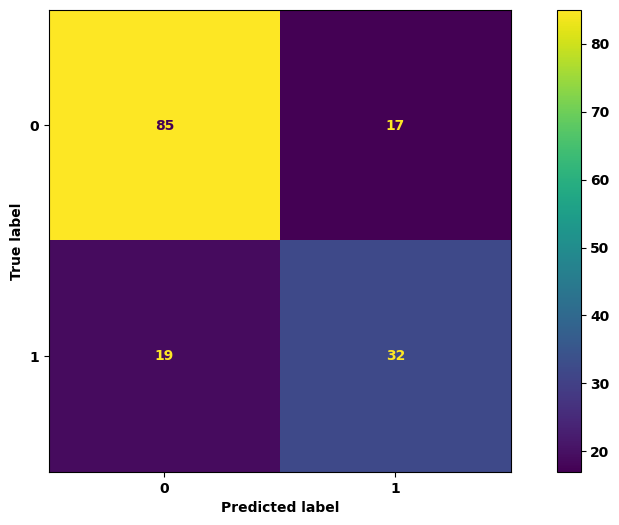

In [371]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb))
disp.plot()

plt.show()

### Modelo XGBoost usando curvas de complejidad

El mejor valor de n_estimators podría ser = 100 que consigue un Accuracy = 0.7647058823529411


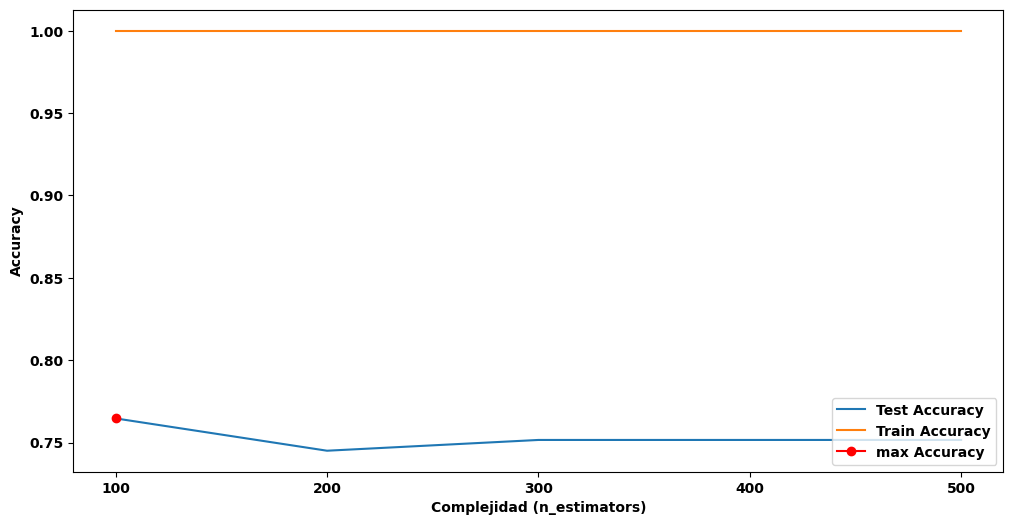

In [372]:
hiper_param_estimators = np.arange(100,501,100)

train_score_estimators = np.zeros(hiper_param_estimators.size) 
test_score_estimators = np.zeros(hiper_param_estimators.size) 

for i in range(hiper_param_estimators.size):
    modelo_xgb = XGBClassifier(n_estimators=hiper_param_estimators[i], random_state=100, n_jobs=-1) 
    modelo_xgb.fit(X_train, y_train)
    train_score_estimators[i] = accuracy_score(y_train, modelo_xgb.predict(X_train)) 
    test_score_estimators[i] = accuracy_score(y_test, modelo_xgb.predict(X_test))    

print("El mejor valor de n_estimators podría ser =", hiper_param_estimators[np.argmax(test_score_estimators)],
      "que consigue un Accuracy =", max(test_score_estimators))

plt.plot(hiper_param_estimators, test_score_estimators, label='Test Accuracy')
plt.plot(hiper_param_estimators, train_score_estimators, label='Train Accuracy')
plt.plot(hiper_param_estimators[np.argmax(test_score_estimators)], max(test_score_estimators),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_estimators)
plt.xlabel('Complejidad (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de max_depth podría ser = 8 que consigue un Accuracy = 0.7777777777777778


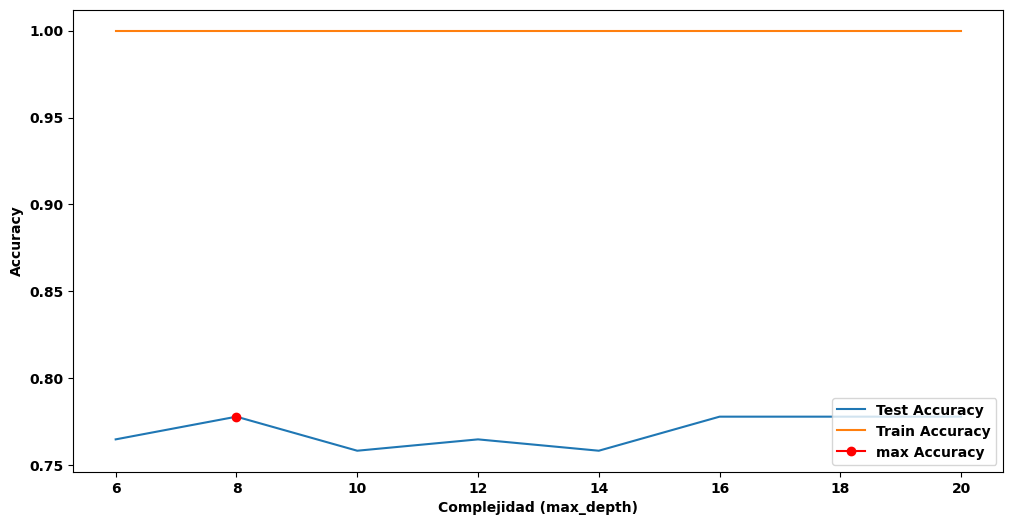

In [373]:
best_n_estimator = hiper_param_estimators[np.argmax(test_score_estimators)]
hiper_param_depths = np.arange(6,21,2)

train_score_depths = np.zeros(hiper_param_depths.size) 
test_score_depths = np.zeros(hiper_param_depths.size) 

for i in range(hiper_param_depths.size):
    modelo_xgb = XGBClassifier(n_estimators=best_n_estimator, max_depth=hiper_param_depths[i], random_state=100, n_jobs=-1) 
    modelo_xgb.fit(X_train, y_train)
    train_score_depths[i] = accuracy_score(y_train, modelo_xgb.predict(X_train)) 
    test_score_depths[i] = accuracy_score(y_test, modelo_xgb.predict(X_test))    

print("El mejor valor de max_depth podría ser =", hiper_param_depths[np.argmax(test_score_depths)],
      "que consigue un Accuracy =", max(test_score_depths))

plt.plot(hiper_param_depths, test_score_depths, label='Test Accuracy')
plt.plot(hiper_param_depths, train_score_depths, label='Train Accuracy')
plt.plot(hiper_param_depths[np.argmax(test_score_depths)], max(test_score_depths),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_depths)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de learning_rate podría ser = 0.3 que consigue un Accuracy = 0.7777777777777778


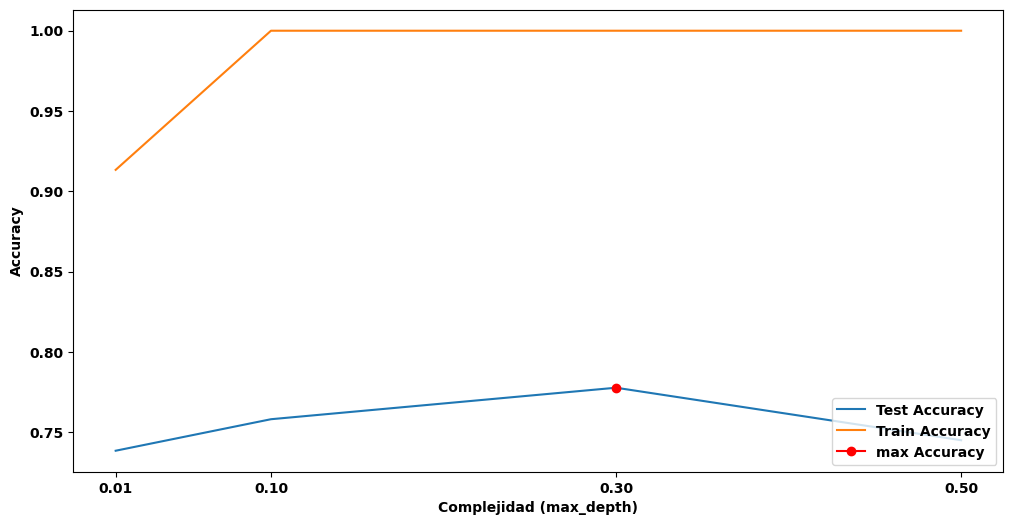

In [374]:
best_n_estimator = hiper_param_estimators[np.argmax(test_score_estimators)]
best_max_depth = hiper_param_depths[np.argmax(test_score_depths)]
hiper_param_learning_rate = [0.01, 0.1, 0.3, 0.5]

train_score_learning_rate = np.zeros(len(hiper_param_learning_rate)) 
test_score_learning_rate = np.zeros(len(hiper_param_learning_rate)) 

for i in range(len(hiper_param_learning_rate)) :
    modelo_xgb = XGBClassifier(learning_rate=hiper_param_learning_rate[i], n_estimators=best_n_estimator, max_depth=best_max_depth, random_state=100, n_jobs=-1) 
    modelo_xgb.fit(X_train, y_train)
    train_score_learning_rate[i] = accuracy_score(y_train, modelo_xgb.predict(X_train)) 
    test_score_learning_rate[i] = accuracy_score(y_test, modelo_xgb.predict(X_test))    

print("El mejor valor de learning_rate podría ser =", hiper_param_learning_rate[np.argmax(test_score_learning_rate)],
      "que consigue un Accuracy =", max(test_score_learning_rate))

plt.plot(hiper_param_learning_rate, test_score_learning_rate, label='Test Accuracy')
plt.plot(hiper_param_learning_rate, train_score_learning_rate, label='Train Accuracy')
plt.plot(hiper_param_learning_rate[np.argmax(test_score_learning_rate)], max(test_score_learning_rate),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_learning_rate)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [375]:
modelo_xgb_opt = XGBClassifier(learning_rate=hiper_param_learning_rate[np.argmax(test_score_learning_rate)], n_estimators=best_n_estimator, max_depth=best_max_depth, random_state=100, n_jobs=-1) 
modelo_xgb_opt.fit(X_train, y_train)
y_pred_xgb_opt = modelo_xgb_opt.predict(X_test)

In [376]:
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb_opt))
print("F1-score: ", f1_score(y_test, y_pred_xgb_opt, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb_opt, zero_division=0))

Accuracy:  0.7777777777777778
F1-score:  0.7753793825222397
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       102
           1       0.68      0.63      0.65        51

    accuracy                           0.78       153
   macro avg       0.75      0.74      0.74       153
weighted avg       0.77      0.78      0.78       153



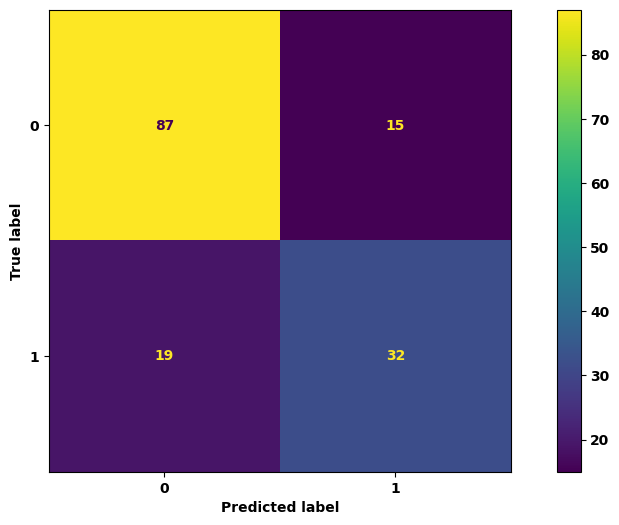

In [377]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb_opt))
disp.plot()

plt.show()